In [36]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import sklearn
from sklearn.metrics import confusion_matrix, recall_score, precision_score, accuracy_score

import xgboost as xgb
from sklearn.metrics import confusion_matrix, recall_score, precision_score
from sklearn.metrics import classification_report
from sklearn.metrics import plot_confusion_matrix

In [2]:
df = pd.read_csv('DataSet_1_Dirty_2.11.2022 v5 (numerics grouped).csv')

In [40]:
df = df.drop('email_address', 1)

/var/folders/9j/sb9k3k3n66dgyqgmnmvbft8w0000gn/T/ipykernel_72425/3409819096.py:1: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  df = df.drop('email_address', 1)


In [41]:
df

,sex,country,region,city,contact_number,income_source,Age,Days_being_customer,Ratio_2w_to_week,Net Deposit Dec 2021,y_actual
0,Male,PH,Metro Manila,Parañaque,6.390000e+11,Practice of Profession,36,401,0.000000,0.0,True
1,Male,AE,al karama,Dubai,9.710000e+12,salary,30,401,0.000000,0.0,True
2,male,PH,Nueva Vizcaya,Solano,9.395438e+09,others Allowance,23,395,0.153846,-26375.0,False
3,female,PH,Cebu,Cebu,9.209720e+09,others Salary,34,343,0.000000,0.0,True
4,Male,PH,camarines norte,daet,6.400000e+11,buy and sell used gadgets,39,177,0.000000,0.0,True
...,...,...,...,...,...,...,...,...,...,...,...
25892,Female,PH,Pampanga,San Fernando,6.400000e+11,Allowance,21,90,0.000000,0.0,True
25893,Female,PH,Nueva Ecija,Llanera,6.400000e+11,Remittance,31,182,0.000000,0.0,True
25894,Male,QA,Doha,Doha,6.390000e+11,Compensation,43,252,0.000000,0.0,True
25895,Male,PH,muntinlupa,muntinlupa,6.390000e+11,Business,27,98,0.000000,0.0,True


In [5]:
#Reversing the Y_target
df.rename(columns={"Month of January": "y_actual"}, inplace=True)

In [6]:
df["y_actual"] = ~df["y_actual"].astype(bool)

In [42]:
df

,sex,country,region,city,contact_number,income_source,Age,Days_being_customer,Ratio_2w_to_week,Net Deposit Dec 2021,y_actual
0,Male,PH,Metro Manila,Parañaque,6.390000e+11,Practice of Profession,36,401,0.000000,0.0,True
1,Male,AE,al karama,Dubai,9.710000e+12,salary,30,401,0.000000,0.0,True
2,male,PH,Nueva Vizcaya,Solano,9.395438e+09,others Allowance,23,395,0.153846,-26375.0,False
3,female,PH,Cebu,Cebu,9.209720e+09,others Salary,34,343,0.000000,0.0,True
4,Male,PH,camarines norte,daet,6.400000e+11,buy and sell used gadgets,39,177,0.000000,0.0,True
...,...,...,...,...,...,...,...,...,...,...,...
25892,Female,PH,Pampanga,San Fernando,6.400000e+11,Allowance,21,90,0.000000,0.0,True
25893,Female,PH,Nueva Ecija,Llanera,6.400000e+11,Remittance,31,182,0.000000,0.0,True
25894,Male,QA,Doha,Doha,6.390000e+11,Compensation,43,252,0.000000,0.0,True
25895,Male,PH,muntinlupa,muntinlupa,6.390000e+11,Business,27,98,0.000000,0.0,True


In [8]:
X = df.loc[:, "Age":'Net Deposit Dec 2021']
y = df['y_actual']

In [9]:
X.head()

,Age,Days_being_customer,Ratio_2w_to_week,Net Deposit Dec 2021
0,36,401,0.000000,0.0
1,30,401,0.000000,0.0
2,23,395,0.153846,-26375.0
3,34,343,0.000000,0.0
4,39,177,0.000000,0.0


In [10]:
y.head()

0     True
1     True
2    False
3     True
4     True
Name: y_actual, dtype: bool

In [11]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [12]:
np.mean(y_train)

0.740696046724912

# XGBoost
Using XGboost to fit my data

In [13]:
#Creating Validation Set
from sklearn.model_selection import train_test_split

X_train, X_val, y_train, y_val = train_test_split(X, y, test_size = 0.2)

In [14]:
X_train

,Age,Days_being_customer,Ratio_2w_to_week,Net Deposit Dec 2021
21503,40,131,0.000000,0.0
6575,25,281,0.000000,0.0
2862,23,396,0.000000,0.0
21907,42,118,0.346154,468.0
19411,26,225,0.000000,0.0
...,...,...,...,...
12680,54,102,0.378205,0.0
10386,27,183,0.181818,0.0
5824,30,278,0.000000,0.0
17273,34,374,0.000000,0.0


In [15]:
X_test

,Age,Days_being_customer,Ratio_2w_to_week,Net Deposit Dec 2021
13867,33,99,0.000000,-50.0
22204,46,393,0.190476,0.0
25624,28,84,0.000000,-155.0
21465,63,127,0.000000,0.0
3197,22,257,0.000000,0.0
...,...,...,...,...
24036,22,180,0.000000,0.0
19842,61,215,0.000000,0.0
245,29,192,0.000000,0.0
9124,32,155,0.000000,0.0


In [16]:
X_val

,Age,Days_being_customer,Ratio_2w_to_week,Net Deposit Dec 2021
4341,27,250,0.0,0.0
19735,22,190,0.0,0.0
9966,36,372,0.0,0.0
15953,49,84,0.0,0.0
19463,49,388,0.0,0.0
...,...,...,...,...
23364,56,98,0.0,0.0
8263,39,146,0.0,0.0
17286,25,373,0.0,0.0
5844,27,287,0.0,0.0


In [17]:
#xgb_model = xgb.XGBRegressor(ntheread=4, n_estimator=200, max_depth=3, eval_metric="rmse")
#eval_set = [(X_train, y_train), (X_val, y_val)]
#xgb_model.fit(X_train, y_train
             #, early_stopping_rounds=10
             #, eval_set = eval_set, verbose=True)

# Predictions

In [18]:
#y_train['xgb_churn'] = [round(y, 2) for y in \
                         #xgb_model.predict(X_train).tolist()]

In [19]:
#y_train

In [20]:
#y_test

In [21]:
#predictions = xgb_model.predict(X_test)

In [22]:
#accuracy = accuracy_score(y_test, predictions)
#print('Accuracy: -' % (accuracy * 100.0))

In [23]:
xgb_model = xgb.XGBClassifier(objective='binary:logistic', missing=1, seed=42)
eval_set = [(X_train, y_train), (X_val, y_val)]
xgb_model.fit(X_train, 
              y_train,
              verbose=True,
              early_stopping_rounds=10,
              eval_metric = 'auc',
              eval_set = eval_set)

[0]	validation_0-auc:0.72192	validation_1-auc:0.71140
[1]	validation_0-auc:0.72323	validation_1-auc:0.71183
[2]	validation_0-auc:0.72971	validation_1-auc:0.71245
[3]	validation_0-auc:0.73333	validation_1-auc:0.71528
[4]	validation_0-auc:0.73520	validation_1-auc:0.71578
[5]	validation_0-auc:0.73616	validation_1-auc:0.71572
[6]	validation_0-auc:0.73831	validation_1-auc:0.71458
[7]	validation_0-auc:0.73973	validation_1-auc:0.71649
[8]	validation_0-auc:0.74124	validation_1-auc:0.71575
[9]	validation_0-auc:0.74169	validation_1-auc:0.71588
[10]	validation_0-auc:0.74361	validation_1-auc:0.71778
[11]	validation_0-auc:0.74404	validation_1-auc:0.71844
[12]	validation_0-auc:0.74535	validation_1-auc:0.71825
[13]	validation_0-auc:0.74574	validation_1-auc:0.71840
[14]	validation_0-auc:0.74588	validation_1-auc:0.71861
[15]	validation_0-auc:0.74648	validation_1-auc:0.71838
[16]	validation_0-auc:0.74836	validation_1-auc:0.71860
[17]	validation_0-auc:0.74937	validation_1-auc:0.71817
[18]	validation_0-au

/Users/lisun/opt/anaconda3/envs/metis/lib/python3.9/site-packages/xgboost/sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[19]	validation_0-auc:0.74991	validation_1-auc:0.71860
[20]	validation_0-auc:0.75090	validation_1-auc:0.71957
[21]	validation_0-auc:0.75307	validation_1-auc:0.71828
[22]	validation_0-auc:0.75532	validation_1-auc:0.71960
[23]	validation_0-auc:0.75548	validation_1-auc:0.71972
[24]	validation_0-auc:0.75833	validation_1-auc:0.71909
[25]	validation_0-auc:0.75942	validation_1-auc:0.71967
[26]	validation_0-auc:0.76055	validation_1-auc:0.71809
[27]	validation_0-auc:0.76065	validation_1-auc:0.71807
[28]	validation_0-auc:0.76100	validation_1-auc:0.71817
[29]	validation_0-auc:0.76109	validation_1-auc:0.71814
[30]	validation_0-auc:0.76187	validation_1-auc:0.71847
[31]	validation_0-auc:0.76193	validation_1-auc:0.71842
[32]	validation_0-auc:0.76213	validation_1-auc:0.71841


XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, enable_categorical=False,
              gamma=0, gpu_id=-1, importance_type=None,
              interaction_constraints='', learning_rate=0.300000012,
              max_delta_step=0, max_depth=6, min_child_weight=1, missing=1,
              monotone_constraints='()', n_estimators=100, n_jobs=8,
              num_parallel_tree=1, predictor='auto', random_state=42,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=42,
              subsample=1, tree_method='exact', validate_parameters=1,
              verbosity=None)

In [24]:
help(xgb.XGBClassifier)

Help on class XGBClassifier in module xgboost.sklearn:

class XGBClassifier(XGBModel, sklearn.base.ClassifierMixin)
 |  XGBClassifier(*, objective: Union[str, Callable[[numpy.ndarray, numpy.ndarray], Tuple[numpy.ndarray, numpy.ndarray]], NoneType] = 'binary:logistic', use_label_encoder: bool = True, **kwargs: Any) -> None
 |  
 |  Implementation of the scikit-learn API for XGBoost classification.
 |  
 |  
 |  Parameters
 |  ----------
 |  
 |      n_estimators : int
 |          Number of boosting rounds.
 |      use_label_encoder : bool
 |          (Deprecated) Use the label encoder from scikit-learn to encode the labels. For new
 |          code, we recommend that you set this parameter to False.
 |  
 |      max_depth :  Optional[int]
 |          Maximum tree depth for base learners.
 |      learning_rate : Optional[float]
 |          Boosting learning rate (xgb's "eta")
 |      verbosity : Optional[int]
 |          The degree of verbosity. Valid values are 0 (silent) - 3 (debug).
 

/Users/lisun/opt/anaconda3/envs/metis/lib/python3.9/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


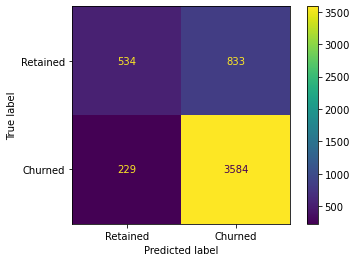

In [31]:
from sklearn.metrics import plot_confusion_matrix
plot_confusion_matrix(xgb_model,
                      X_test,
                      y_test,
                      values_format='d',
                      display_labels = ["Retained", "Churned"])

In [37]:
print(classification_report(y_test, xgb_model.predict(X_test)))

              precision    recall  f1-score   support

       False       0.70      0.39      0.50      1367
        True       0.81      0.94      0.87      3813

    accuracy                           0.79      5180
   macro avg       0.76      0.67      0.69      5180
weighted avg       0.78      0.79      0.77      5180



In [32]:
#Test
r_test = recall_score(y_test, xgb_model.predict(X_test))
r_test

0.9399423026488329

In [33]:
p_test = precision_score(y_test, xgb_model.predict(X_test))
p_test

0.8114104595879557

/Users/lisun/opt/anaconda3/envs/metis/lib/python3.9/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


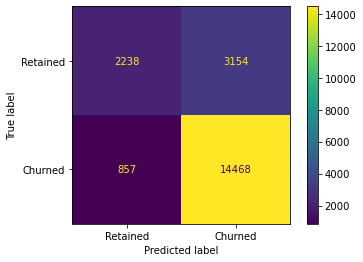

In [28]:
#Train
from sklearn.metrics import plot_confusion_matrix
plot_confusion_matrix(xgb_model,
                      X_train,
                      y_train,
                      values_format='d',
                      display_labels = ["Retained", "Churned"])

In [38]:
print(classification_report(y_train, xgb_model.predict(X_train)))

              precision    recall  f1-score   support

       False       0.72      0.42      0.53      5392
        True       0.82      0.94      0.88     15325

    accuracy                           0.81     20717
   macro avg       0.77      0.68      0.70     20717
weighted avg       0.80      0.81      0.79     20717



0.9286415711947626